In [45]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
import pandas as pd

df = pd.read_csv('vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27809 entries, 0 to 27808
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27809 non-null  int64 
 1   user_name         27809 non-null  object
 2   user_location     21363 non-null  object
 3   user_description  25862 non-null  object
 4   user_created      27809 non-null  object
 5   user_followers    27809 non-null  int64 
 6   user_friends      27809 non-null  int64 
 7   user_favourites   27809 non-null  int64 
 8   user_verified     27809 non-null  bool  
 9   date              27809 non-null  object
 10  text              27809 non-null  object
 11  hashtags          21946 non-null  object
 12  source            27794 non-null  object
 13  retweets          27809 non-null  int64 
 14  favorites         27809 non-null  int64 
 15  is_retweet        27809 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

id                     0
user_name              0
user_location       6446
user_description    1947
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            5863
source                15
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [6]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [7]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet'],axis=1)

In [8]:
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [11]:
print(text_df['text'].iloc[0],'\n')
print(text_df['text'].iloc[1],'\n')
print(text_df['text'].iloc[2],'\n')
print(text_df['text'].iloc[3],'\n')
print(text_df['text'].iloc[4],'\n')

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [12]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27809 entries, 0 to 27808
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27809 non-null  object
dtypes: object(1)
memory usage: 217.4+ KB


In [13]:
def data_procssing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
    text = re.sub(r'\@+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stopwords]
    return ' '.join(filtered_text)

In [14]:
text_df.text = text_df['text'].apply(data_procssing)

In [15]:
text_df.duplicated().sum()

1448

In [16]:
text_df = text_df.drop_duplicates('text')

# Stemming

In [17]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [18]:
text_df['text'] = text_df['text'].apply(lambda x:stemming(x))

In [19]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [20]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26361 entries, 0 to 27807
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    26361 non-null  object
dtypes: object(1)
memory usage: 411.9+ KB


In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [24]:
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [25]:
def sentiment(label):
    if label <0:
        return 'Negative'
    elif label == 0:
        return 'Neutral'
    elif label>0:
        return 'Positive'

In [26]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [27]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

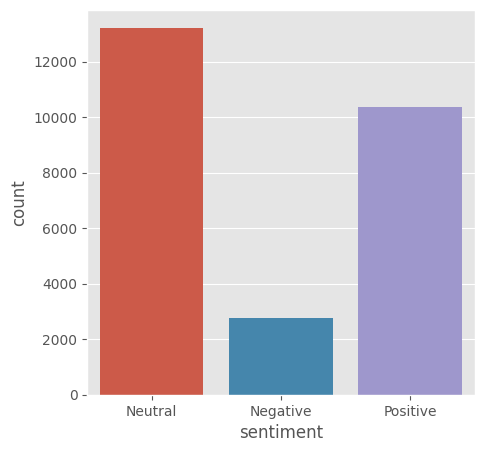

In [28]:
fig = plt.figure(figsize=(5,5))

sns.countplot(x='sentiment',data=text_df)

# Pie chart

Text(0.5, 1.0, 'Distribution of Sentiments')

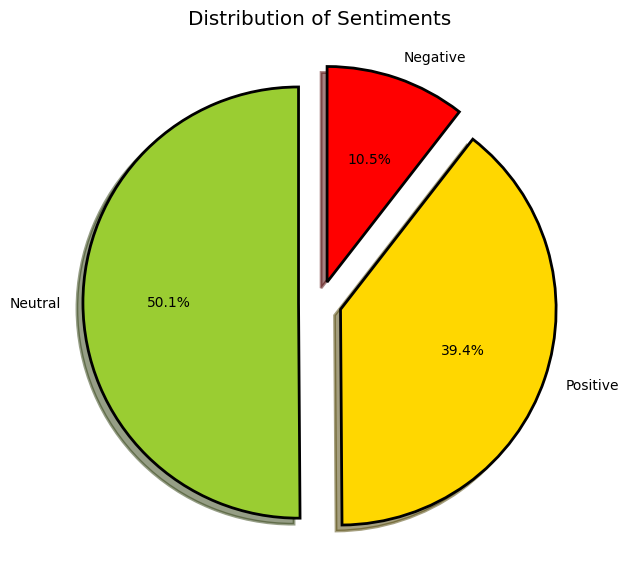

In [29]:
fig = plt.figure(figsize=(7,7))
colors = ('yellowgreen','gold','red')
wp = {'linewidth':2,'edgecolor':'black'}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops = wp,explode = explode,label='')
plt.title('Distribution of Sentiments')

In [32]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
5172,pfizer efficacy vaccine dose basically use p p...,1.0,Positive
22854,sophie_mokoena think zuma vaccinated best vacc...,1.0,Positive
26078,nypost covaxin best,1.0,Positive
26050,swamy39 pgurus1 excellent news indeed withstan...,1.0,Positive
11252,drpete00 scottythequeuejumper resignaustralian...,1.0,Positive


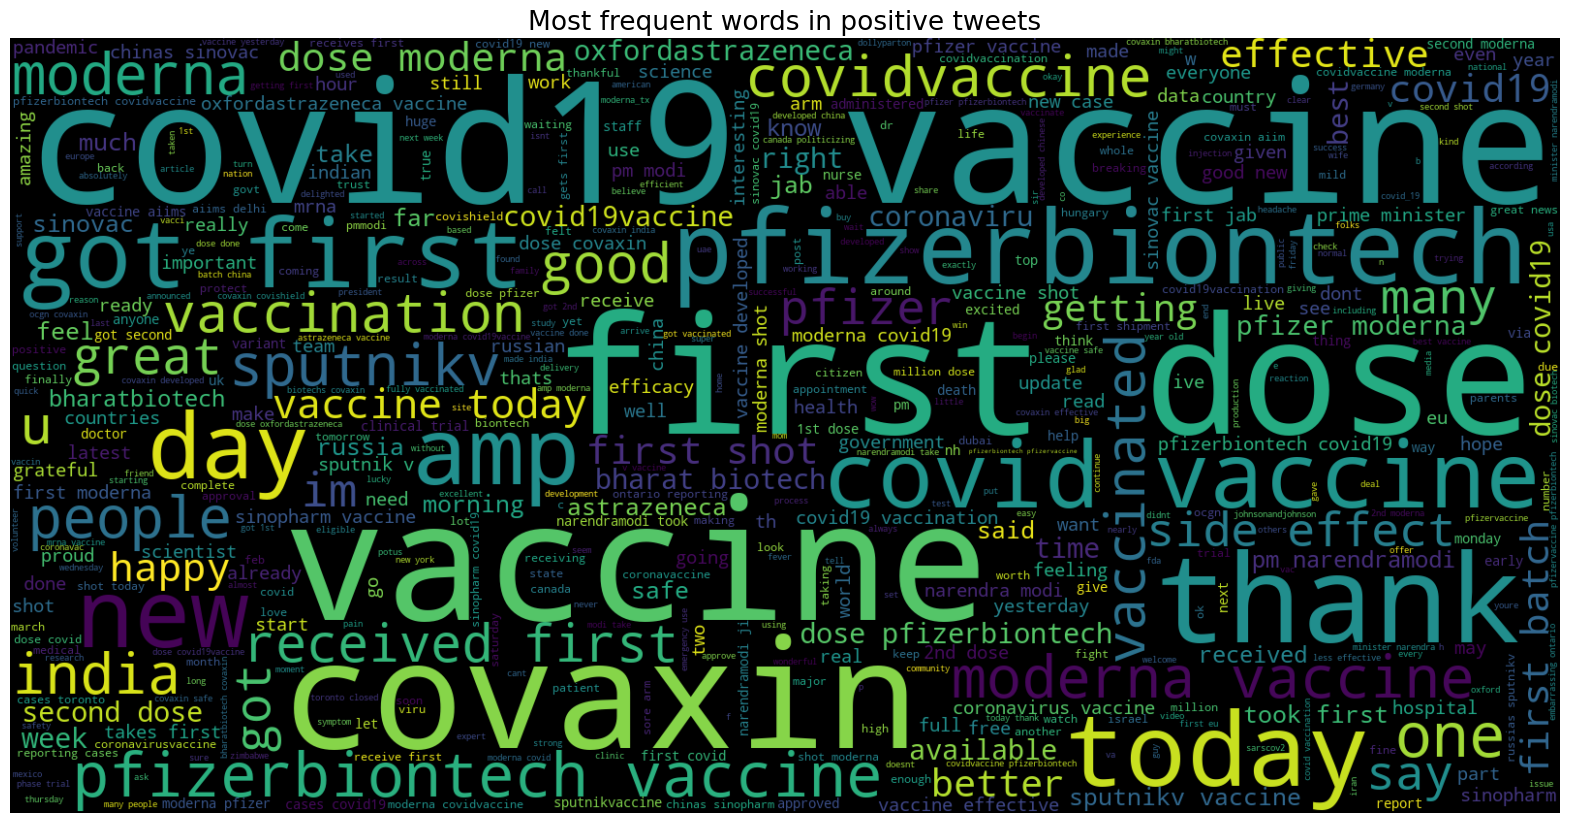

In [33]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [34]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
23329,globaltimesnews false propaganda said safe con...,-3.700743e-17,Negative
2912,work skilled nursing facility got first vaccin...,-3.333333e-03,Negative
7507,expected first half 2021 moderna mrna pfizerbi...,-4.166667e-03,Negative
6258,b1351 new covid20 past infection covid19 offer...,-4.545455e-03,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-4.761905e-03,Negative


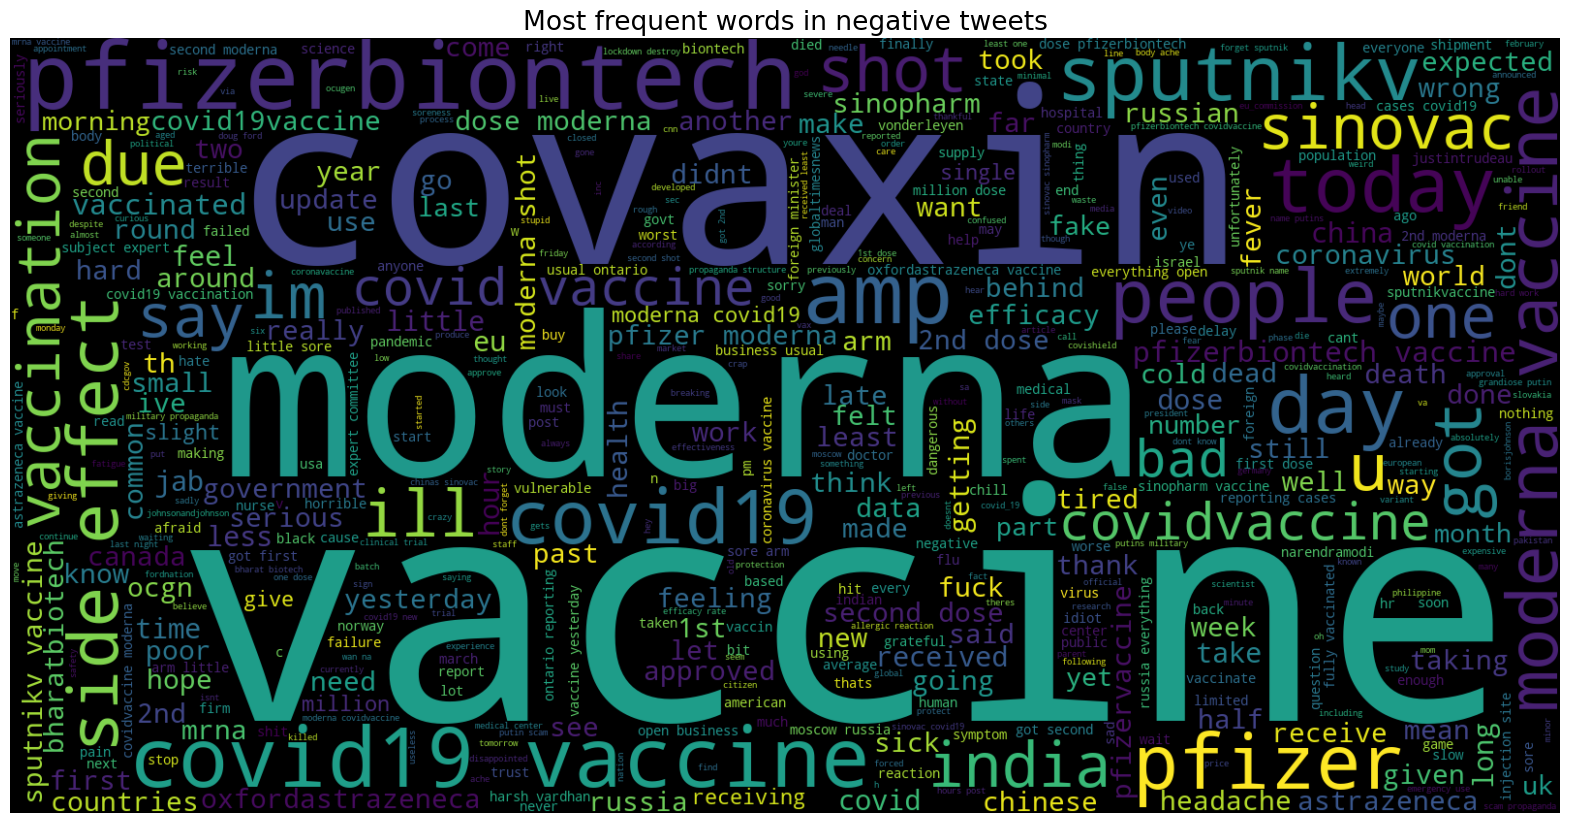

In [35]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [37]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [38]:
feature_names = vect.get_feature_names_out()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features:\n {}'.format(feature_names[:20]))

Number of features: 177124

First 20 features:
 ['000' '000 000the' '000 belgium' '000 deaths' '000 donated' '000 dose'
 '000 doses' '000 health' '000 initial' '000 people' '000 share'
 '000 sinopharm' '000 vaccines' '0001' '0001 risk' '000the'
 '000the standard' '004' '004 covid' '004 israelis']


In [39]:
x = text_df['text']
y = text_df['sentiment']
x = vect.transform(x)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [41]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (21088, 177124)
Size of y_train: (21088,)
Size of x_test: (5273, 177124)
Size of y_test: (5273,)


In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.01%


In [44]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 284  228   61]
 [   5 2660    7]
 [  23  203 1802]]


              precision    recall  f1-score   support

    Negative       0.91      0.50      0.64       573
     Neutral       0.86      1.00      0.92      2672
    Positive       0.96      0.89      0.92      2028

    accuracy                           0.90      5273
   macro avg       0.91      0.79      0.83      5273
weighted avg       0.91      0.90      0.89      5273



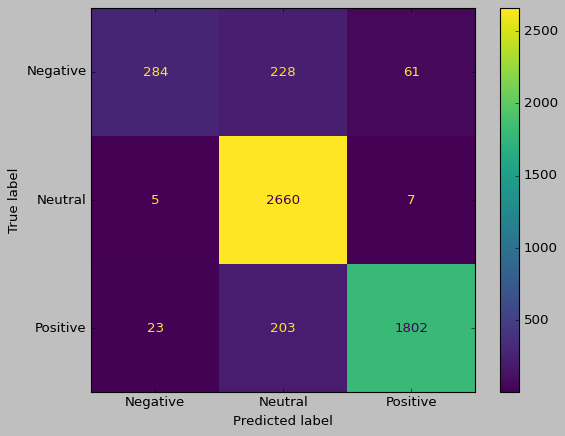

In [46]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [49]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [50]:
y_pred = grid.predict(x_test)

In [51]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.12%


In [52]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 317  197   59]
 [   6 2658    8]
 [  26  172 1830]]


              precision    recall  f1-score   support

    Negative       0.91      0.55      0.69       573
     Neutral       0.88      0.99      0.93      2672
    Positive       0.96      0.90      0.93      2028

    accuracy                           0.91      5273
   macro avg       0.92      0.82      0.85      5273
weighted avg       0.91      0.91      0.91      5273



In [53]:
from sklearn.svm import LinearSVC

In [54]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [55]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 92.68%


In [56]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 364  152   57]
 [   8 2657    7]
 [  22  140 1866]]


              precision    recall  f1-score   support

    Negative       0.92      0.64      0.75       573
     Neutral       0.90      0.99      0.95      2672
    Positive       0.97      0.92      0.94      2028

    accuracy                           0.93      5273
   macro avg       0.93      0.85      0.88      5273
weighted avg       0.93      0.93      0.92      5273



In [57]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [58]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [59]:
y_pred = grid.predict(x_test)

In [60]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 92.81%


In [61]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 365  152   56]
 [   8 2656    8]
 [  22  133 1873]]


              precision    recall  f1-score   support

    Negative       0.92      0.64      0.75       573
     Neutral       0.90      0.99      0.95      2672
    Positive       0.97      0.92      0.94      2028

    accuracy                           0.93      5273
   macro avg       0.93      0.85      0.88      5273
weighted avg       0.93      0.93      0.92      5273

